In [ ]:
# Graded Assignment 2.1: K-means Clustering

In [ ]:
# Utilise Libraries/Data Setup

In [ ]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


In [ ]:
DATA_PATH = "/content/sample_data/customer_data.csv"

df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
df.T


Shape: (200, 6)


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
CustomerID,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,191.000000,192.000000,193.000000,194.000000,195.000000,196.000000,197.000000,198.000000,199.000000,200.000000
Age,56.000000,69.000000,46.000000,32.000000,60.000000,25.000000,38.000000,56.000000,36.000000,40.000000,...,42.000000,56.000000,50.000000,18.000000,44.000000,69.000000,30.000000,58.000000,20.000000,56.000000
Annual Income (k$),84.000000,86.000000,41.000000,23.000000,76.000000,51.000000,111.000000,65.000000,58.000000,38.000000,...,109.000000,113.000000,74.000000,111.000000,77.000000,99.000000,46.000000,101.000000,47.000000,81.000000
Spending Score (1-100),71.905329,38.482533,38.967487,10.002036,56.350309,66.970569,99.674560,59.986375,27.951925,37.247963,...,58.788965,81.010607,26.863379,100.000000,51.094868,72.199741,9.799737,42.337887,60.307894,59.967226
Purchase Frequency,5.900000,6.000000,7.500000,1.700000,2.900000,6.000000,8.700000,5.800000,2.800000,7.000000,...,7.800000,1.100000,0.900000,6.400000,3.800000,2.500000,6.000000,3.700000,5.600000,4.900000
Avg Purchase Value,106.071893,62.755253,29.958887,67.007220,72.704110,19.512164,19.176877,10.000000,17.270030,10.000000,...,71.508447,103.420590,30.650895,112.909695,10.000000,85.030906,74.545607,45.879083,17.218305,74.882955


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Age                     200 non-null    int64  
 2   Annual Income (k$)      200 non-null    int64  
 3   Spending Score (1-100)  200 non-null    float64
 4   Purchase Frequency      200 non-null    float64
 5   Avg Purchase Value      200 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 9.5 KB


In [ ]:
df.isna().sum().sort_values(ascending=False) # no empty cols

,0
CustomerID,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0
Purchase Frequency,0
Avg Purchase Value,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.500000,57.879185,1.0,50.750000,100.500000,150.250000,200.00000
Age,200.0,43.425000,14.941910,18.0,31.000000,43.500000,56.000000,69.00000
Annual Income (k$),200.0,67.145000,31.249587,15.0,41.000000,66.500000,95.250000,119.00000
Spending Score (1-100),200.0,50.869302,22.563855,1.0,32.366332,52.352457,67.224241,100.00000
Purchase Frequency,200.0,5.335500,2.687808,0.6,3.000000,5.450000,7.600000,10.00000
Avg Purchase Value,200.0,43.092021,29.326249,10.0,17.651673,36.086311,59.641832,137.62115


In [ ]:
print("Duplicate rows:", df.duplicated().sum())
print("Duplicate CustomerIDs:", df["CustomerID"].duplicated().sum())

Duplicate rows: 0
Duplicate CustomerIDs: 0


In [ ]:
# Data Visualisation and Enhancement

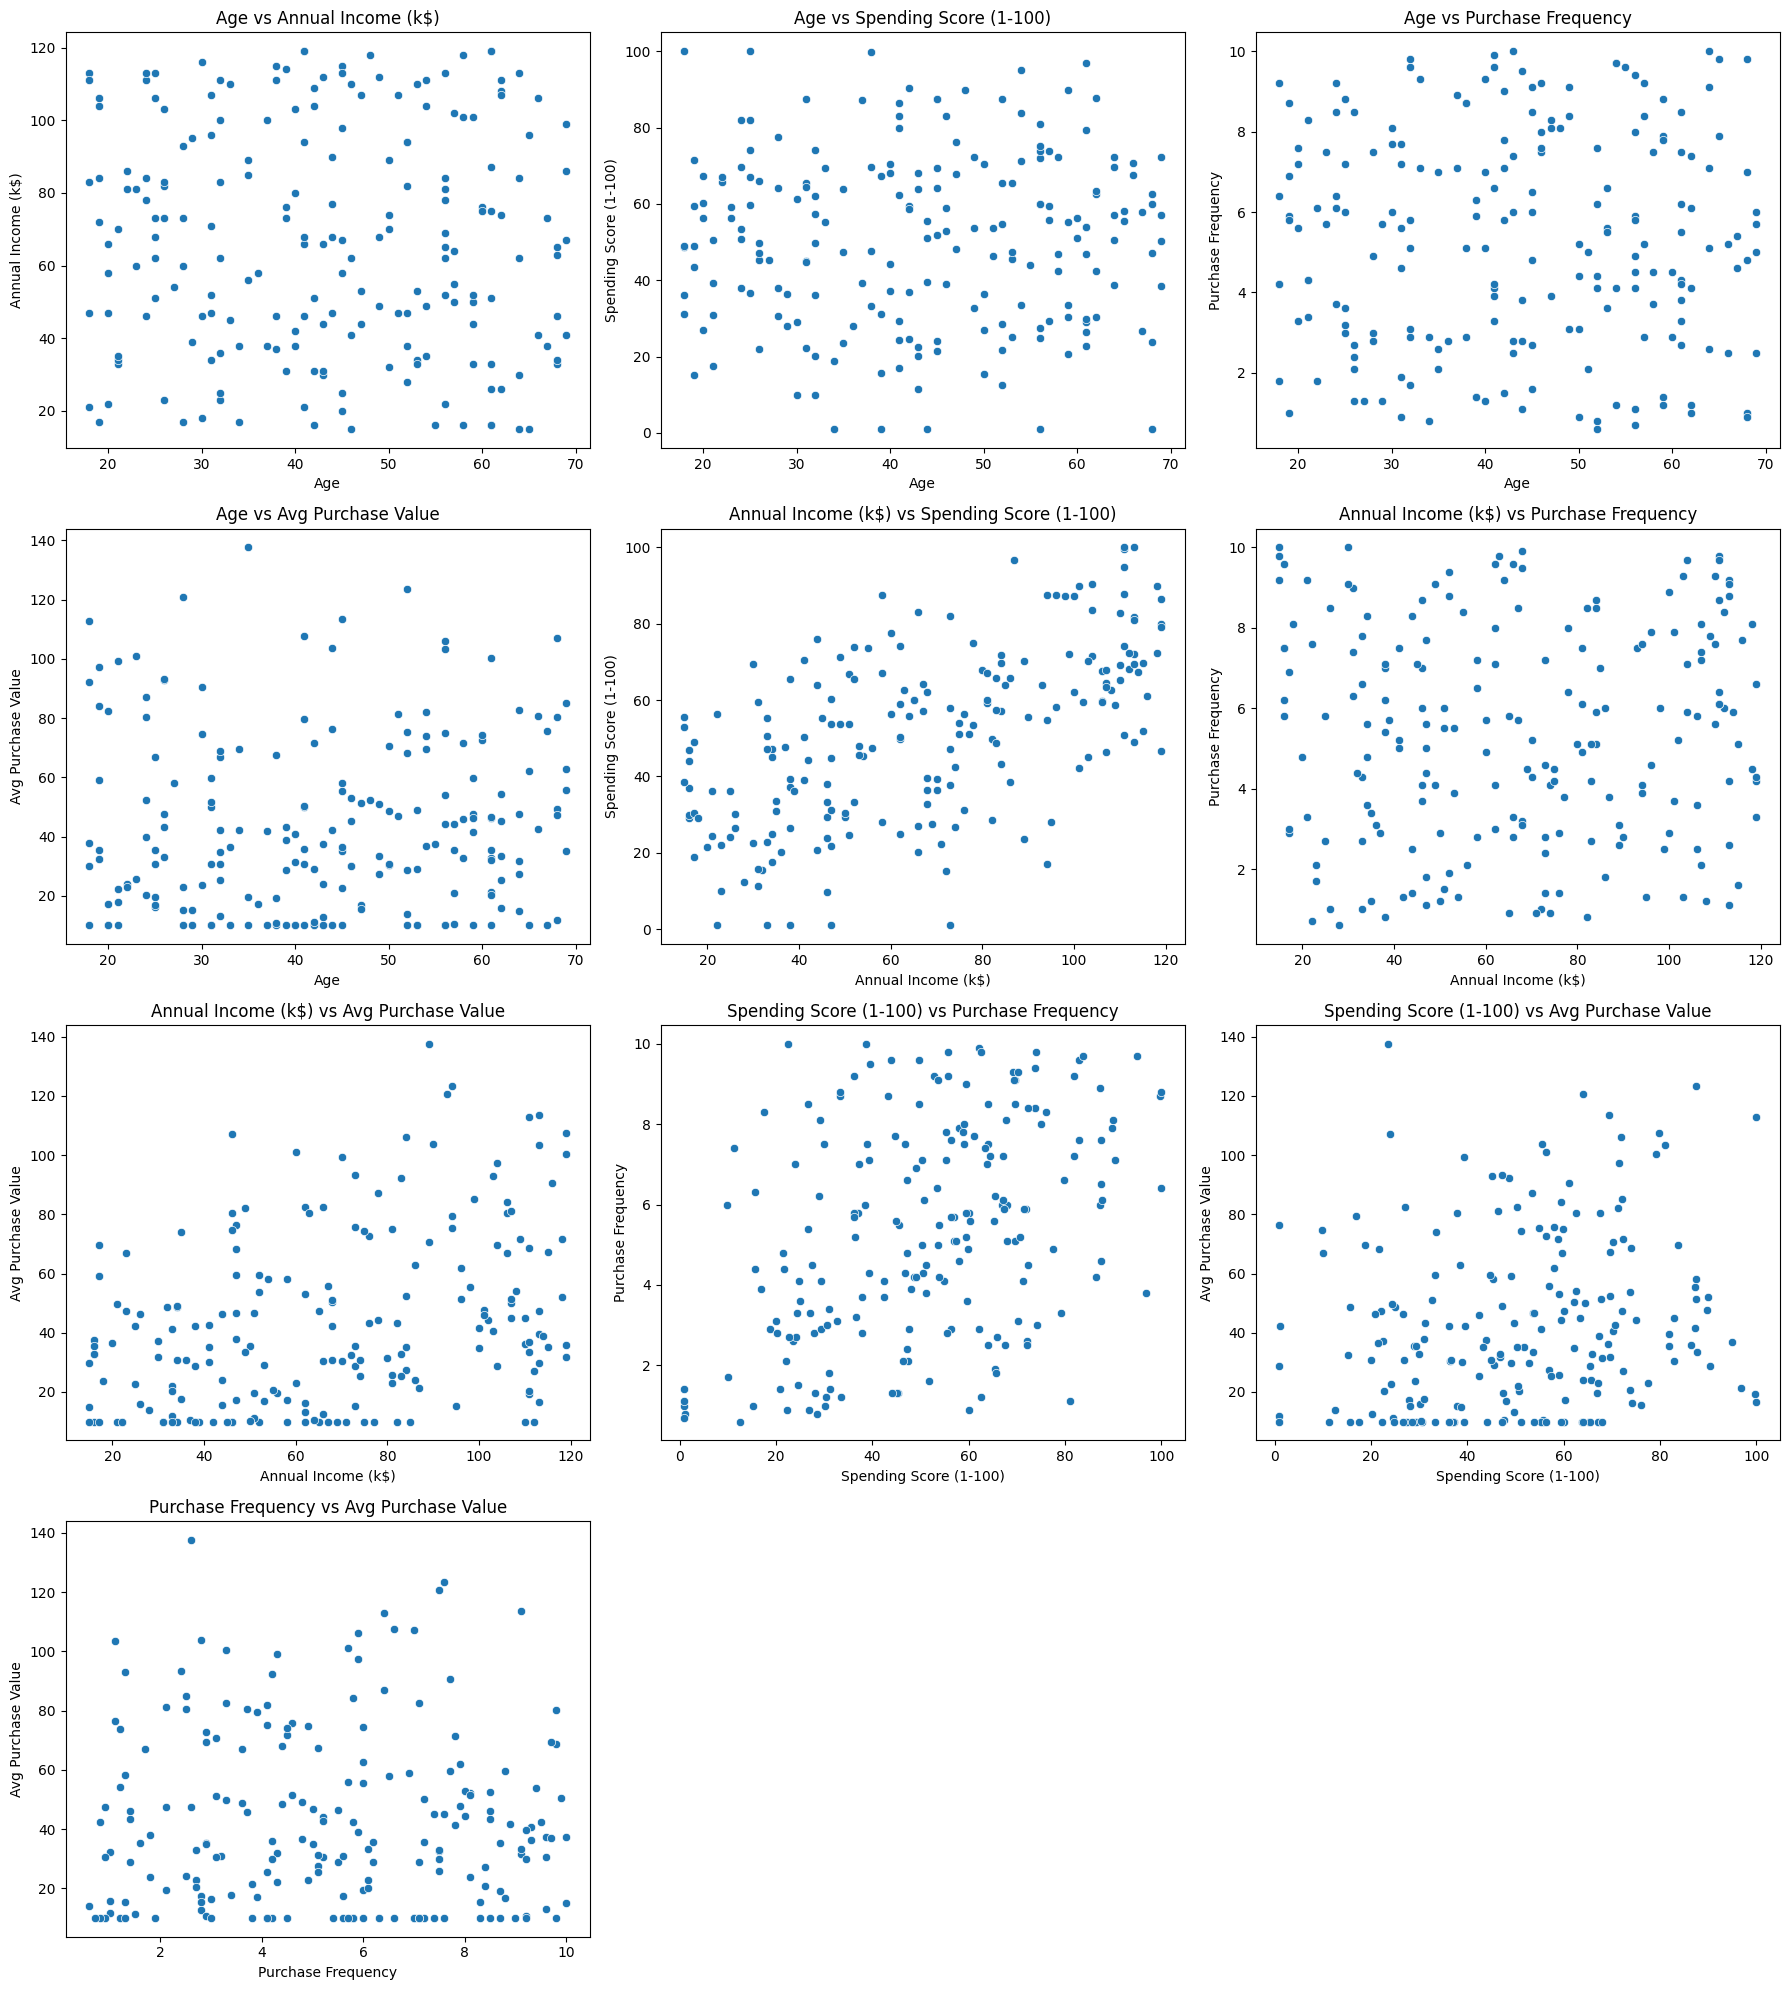

In [ ]:

pairs = [
    ("Age", "Annual Income (k$)"),
    ("Age", "Spending Score (1-100)"),
    ("Age", "Purchase Frequency"),
    ("Age", "Avg Purchase Value"),
    ("Annual Income (k$)", "Spending Score (1-100)"),
    ("Annual Income (k$)", "Purchase Frequency"),
    ("Annual Income (k$)", "Avg Purchase Value"),
    ("Spending Score (1-100)", "Purchase Frequency"),
    ("Spending Score (1-100)", "Avg Purchase Value"),
    ("Purchase Frequency", "Avg Purchase Value"),
]

n_plots = len(pairs)
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for ax, (x, y) in zip(axes, pairs):
    sns.scatterplot(data=df, x=x, y=y, ax=ax)
    ax.set_title(f"{x} vs {y}")

for i in range(len(pairs), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


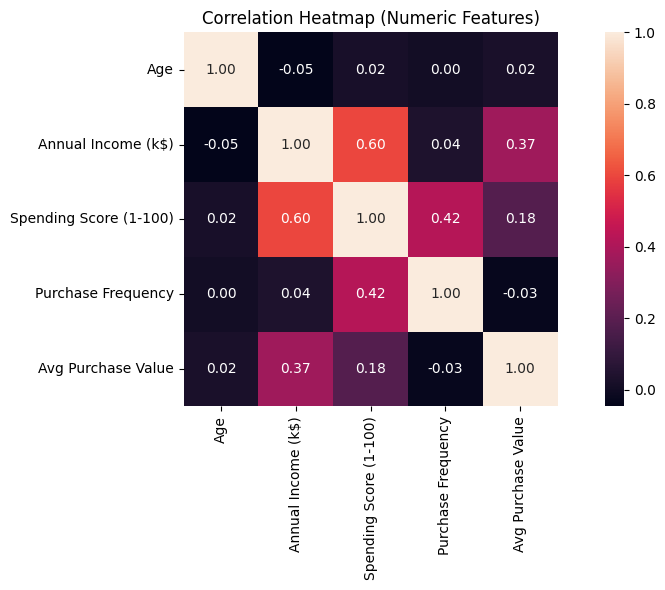

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
id_cols = ["CustomerID"]
feature_cols = [c for c in num_cols if c not in id_cols]
corr = df[feature_cols].corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()


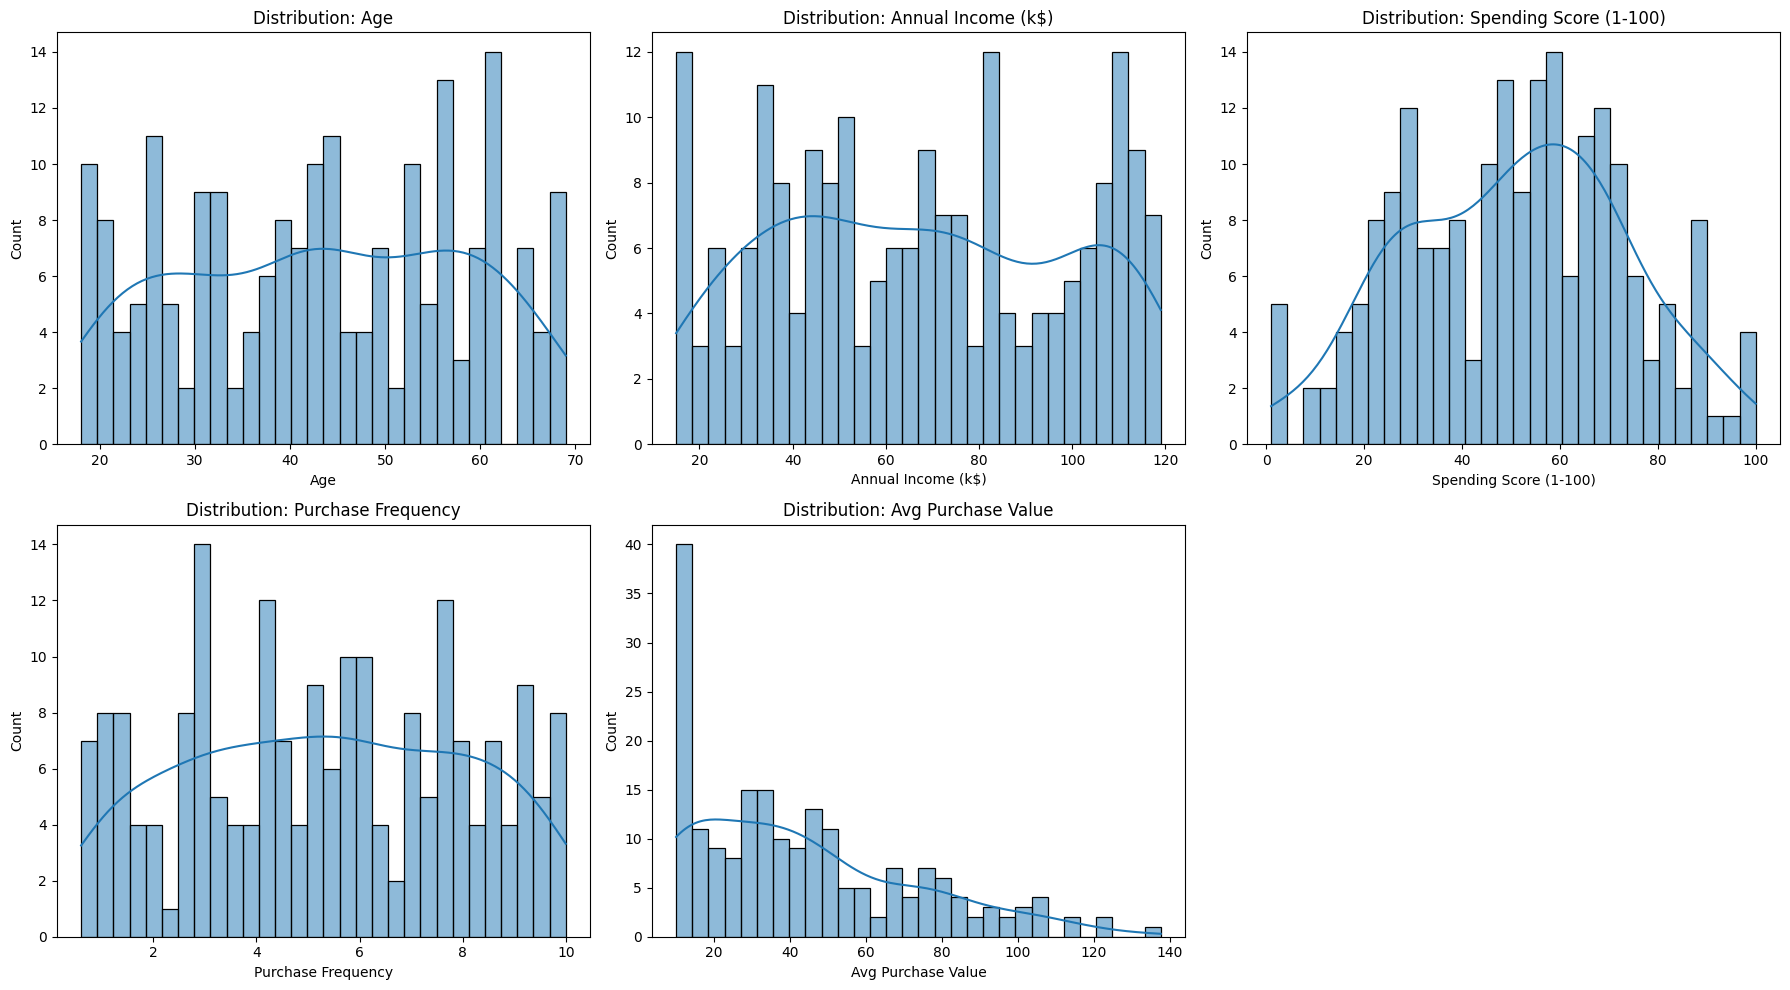

In [ ]:

n_plots = len(feature_cols)
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for ax, col in zip(axes, feature_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=ax)
    ax.set_title(f"Distribution: {col}")

# Remove unused subplots
for i in range(len(feature_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


| Histogram       | KDE                         |
| --------------- | --------------------------- |
| Discrete bars   | Smooth continuous curve     |
| Depends on bins | Depends on bandwidth        |
| Rough shape     | Clear trend                 |
| Good for counts | Good for distribution shape |


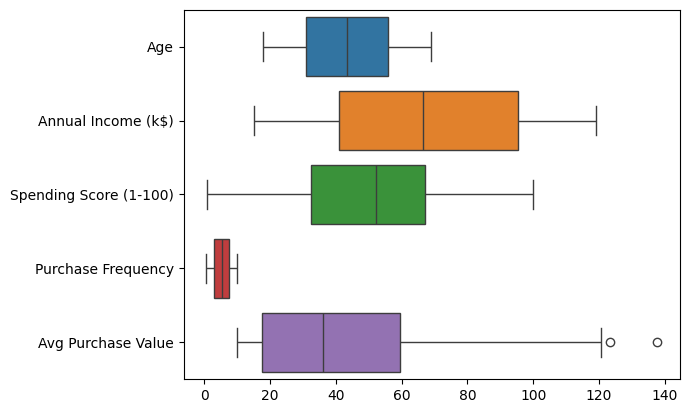

In [ ]:
sns.boxplot(data=df[feature_cols], orient="h")
plt.show()

In [ ]:
# Optional: IQR-based outlier filtering
"""
Identifies outliers using the IQR distribution-agnostic rule
Checks outliers only for selected columns
Removes rows that contain outliers in any of those columns

"""
def iqr_filter(data: pd.DataFrame, columns, k: float = 1.5):
    # k = 1.5 is the standard Tukey rule
      # Larger k → more tolerant, fewer outliers removed
      # Smaller k → stricter filtering
    mask = pd.Series(True, index=data.index)
    for c in columns:
        q1 = data[c].quantile(0.25)           # Q1 (25th percentile) → lower quartile
        q3 = data[c].quantile(0.75)          # Q3 (75th percentile) → upper quartile
        iqr = q3 - q1          # The IQR captures the middle 50% of the data and is robust to extreme values.
        lo = q1 - k * iqr
        hi = q3 + k * iqr
        mask &= data[c].between(lo, hi) # Values inside [lo, hi] are considered normal
    return data[mask], mask

df_no_outliers, keep_mask = iqr_filter(df, feature_cols, k=1.5)

print("Rows before:", len(df))
print("Rows after outlier filter:", len(df_no_outliers))
print("Rows removed:", len(df) - len(df_no_outliers))


Rows before: 200
Rows after outlier filter: 198
Rows removed: 2


In [ ]:
X = df_no_outliers[feature_cols].copy()

# Option A: Standardisation (recommended for K-Means)
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)

# Option B: Min-Max scaling (alternative)
scaler_mm = MinMaxScaler()
X_mm = scaler_mm.fit_transform(X)

print("Standardised data shape:", X_std.shape)
print("MinMax scaled data shape:", X_mm.shape)


Standardised data shape: (198, 5)
MinMax scaled data shape: (198, 5)


In [ ]:
# Display transformed data summary (Standardised)
X_std_df = pd.DataFrame(X_std, columns=feature_cols)
X_std_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,198.0,1.614870e-16,1.002535,-1.700025,-0.830763,0.005066,0.840895,1.710157
Annual Income (k$),198.0,1.054151e-16,1.002535,-1.661797,-0.829281,-0.028786,0.923804,1.668265
Spending Score (1-100),198.0,5.719331e-17,1.002535,-2.225548,-0.802752,0.068393,0.731158,2.196835
Purchase Frequency,198.0,-3.409170e-16,1.002535,-1.766059,-0.862133,0.041794,0.833894,1.737820
Avg Purchase Value,198.0,-7.177199e-17,1.002535,-1.148965,-0.885087,-0.231615,0.592421,2.801097
